## First Attempt on Quora


In [81]:
import json
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [82]:
# Load the JSON data from the file
with open('Quora.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Create an empty DataFrame to store the cleaned data
cleaned_data = pd.DataFrame(columns=['question', 'text', 'views', 'upvotes'])

# Define stopwords and text preprocessing tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Regex pattern to extract views
views_pattern = re.compile(r'(\d+) views')

In [83]:
data

{'Are vegans making an impact on climate change?': [{'isRelated': False,
   'isRequested': True,
   'views': '441',
   'text': 'Wayne Roberts\nwrites regularly on food, cities and food policyAuthor has 483 answers and 643.6K answer views5y\nI like to think that I have arrived at a balanced perspective on this kind of issue because I have often experimented with a vegan diet and have also had a long experience managing a food policy council —which taught me the importance of seeing food issues from a whole food system perspective.\nVegans can have a positive impact on climate protection. But the precise impact depends on a lot more than vegan choices.\nIf a vegan chooses mainly local and sustainable and minimally processed plant-based foods, that has an enormous impact for good.\nBut if another vegan chooses long distance foods that were sprayed with pesticides, packaged in plastic, and kept in a freezer for a long time, the impact will be negative.\nWalking or driving to the store also

In [84]:
import json
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Load the JSON data from the file
with open('Quora.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Create an empty list to store the cleaned data
cleaned_data = []

# Define stopwords and text preprocessing tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Regex pattern to extract views
views_pattern = re.compile(r'(\d+) views')

# Iterate through each question and its associated answers
for question, answers in data.items():
    for answer in answers:
        # Extract relevant information from the answer
        text = answer['text']
        
        # Extract views if available
        views_match = views_pattern.search(text)
        if views_match:
            views = views_match.group(1)
            text = views_pattern.sub('', text)  # Remove views from text
        else:
            views = None

        upvotes = re.search(r'(\d+) Upvotes', answer['upvotes'])
        if upvotes:
            upvotes = upvotes.group(1)
            text = views_pattern.sub('', text)  
        else:
            upvotes = None

        # Clean the text by removing HTML tags and extra spaces
        text = BeautifulSoup(text, 'html.parser').get_text()
        text = ' '.join(text.split())

        # Lowercasing
        text = text.lower()

        # Tokenization (split text into words)
        words = word_tokenize(text)

        # Remove stopwords and apply stemming or lemmatization
        words = [stemmer.stem(word) for word in words if word not in stop_words]
        # You can use stemming instead by replacing lemmatizer.lemmatize() with stemmer.stem()

        # Join the words back into a cleaned text
        cleaned_text = ' '.join(words)

        # Append the data to the list as a dictionary
        cleaned_data.append({'question': question, 'text': cleaned_text, 'views': views, 'upvotes': upvotes})

# Create a pandas DataFrame from the list of dictionaries
cleaned_df = pd.DataFrame(cleaned_data)

# Print the first few rows of the DataFrame (for verification)
print(cleaned_df.head())

# Optionally, you can save the DataFrame to a CSV file if needed
# cleaned_df.to_csv('cleaned_quora_data.csv', index=False)

print("Data preprocessing and cleaning completed. DataFrame created.")


                                         question  \
0  Are vegans making an impact on climate change?   
1  Are vegans making an impact on climate change?   
2  Are vegans making an impact on climate change?   
3  Are vegans making an impact on climate change?   
4  Are vegans making an impact on climate change?   

                                                text views upvotes  
0  wayn robert write regularli food , citi food p...   441       5  
1  kevin baker environ technic artist crystal dyn...   195       2  
2  ch crawley avion techauthor 4.4k answer 1.5m a...   659       8  
3  daniel budd author 5.3k answer 936.5k answer v...    48    None  
4  lesli harvey studi univers california , lo ang...   106       6  
Data preprocessing and cleaning completed. DataFrame created.


In [85]:
cleaned_df.to_csv('cleaned_quora_data.csv', index=False)

## 2nd Attempt on Quora


In [86]:
# Load the JSON data from the file
with open('New_Quora.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Create an empty DataFrame to store the cleaned data
cleaned_data = pd.DataFrame(columns=['question', 'text', 'views', 'upvotes'])

# Define stopwords and text preprocessing tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Regex pattern to extract views
views_pattern = re.compile(r'(\d+) views')

In [87]:
data

{'Are vegans making an impact on climate change?': [{'author': 'Wayne Roberts',
   'author_bio': 'writes regularly on food, cities and food policyAuthor has 483 answers and 643.6K answer views5y',
   'text': 'I like to think that I have arrived at a balanced perspective on this kind of issue because I have often experimented with a vegan diet and have also had a long experience managing a food policy council —which taught me the importance of seeing food issues from a whole food system perspective.\nVegans can have a positive impact on climate protection. But the precise impact depends on a lot more than vegan choices.\nIf a vegan chooses mainly local and sustainable and minimally processed plant-based foods, that has an enormous impact for good.\nBut if another vegan chooses long distance foods that were sprayed with pesticides, packaged in plastic, and kept in a freezer for a long time, the impact will be negative.\nWalking or driving to the store also makes a difference.\nIn the fin

In [88]:
import json
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


# Load the JSON data from the file
with open('New_Quora.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Create an empty list to store the cleaned data
cleaned_data = []

# Define stopwords and text preprocessing tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Regex pattern to extract views
views_pattern = re.compile(r'(\d+) views')

# Iterate through each question and its associated answers
for question, answers in data.items():
    for answer in answers:
        # Extract relevant information from the answer
        text = answer['text']
        author = answer['author']
        author_bio = answer['author_bio']

        # Extract views if available
        views_match = views_pattern.search(text)
        if views_match:
            views = views_match.group(1)
            text = views_pattern.sub('', text)  # Remove views from text
        else:
            views = None

        upvotes = re.search(r'(\d+) Upvotes', answer['upvotes'])
        if upvotes:
            upvotes = upvotes.group(1)
            text = re.sub(r'(\d+) Upvotes', '', text)  # Remove upvotes from text
        else:
            upvotes = None

        # Clean the text by removing HTML tags and extra spaces
        text = BeautifulSoup(text, 'html.parser').get_text()
        text = ' '.join(text.split())

        # Lowercasing
        text = text.lower()

        # Tokenization (split text into words)
        words = word_tokenize(text)

        # Remove stopwords and apply stemming or lemmatization
        words = [stemmer.stem(word) for word in words if word not in stop_words]
        # You can use stemming instead by replacing lemmatizer.lemmatize() with stemmer.stem()

        # Join the words back into a cleaned text
        cleaned_text = ' '.join(words)

        # Append the data to the list as a dictionary
        cleaned_data.append({'question': question, 'text': cleaned_text, 'views': views, 'upvotes': upvotes,
                             'author': author, 'author_bio': author_bio})

# Create a pandas DataFrame from the list of dictionaries
cleaned_df = pd.DataFrame(cleaned_data)

# Print the first few rows of the DataFrame (for verification)
print(cleaned_df.head())

# Optionally, you can save the DataFrame to a CSV file if needed
# cleaned_df.to_csv('cleaned_quora_data.csv', index=False)

print("Data preprocessing and cleaning completed. DataFrame created.")


c:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


                                         question  \
0  Are vegans making an impact on climate change?   
1  Are vegans making an impact on climate change?   
2  Are vegans making an impact on climate change?   
3  Are vegans making an impact on climate change?   
4  Are vegans making an impact on climate change?   

                                                text views upvotes  \
0  like think arriv balanc perspect kind issu oft...   441       5   
1  individu basi , vegan diet take someth like ha...   195       2   
2  human make impact climat chang . driven solar ...   659       8   
3  relat vegan help climat chang ? nope . so-cal ...    48    None   
4  relat vegan affect climat chang ? much affect ...   106       6   

          author                                         author_bio  
0  Wayne Roberts  writes regularly on food, cities and food poli...  
1    Kevin Baker  Environment Technical Artist at Crystal Dynami...  
2     CH Crawley  Avionics techAuthor has 4.4K ans

In [89]:
import json
import pandas as pd
import re
import string
import unicodedata
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt


# Load the JSON data from the file
with open('New_Quora.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Create an empty list to store the cleaned data
cleaned_data = []

# Define stopwords and text preprocessing tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Regex pattern to extract views
views_pattern = re.compile(r'(\d+) views')

# Function to remove emojis from text
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U0001F004-\U0001F0CF"  # Additional emoticons
                               u"\U0001F170-\U0001F251"  # Enclosed characters
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Function to remove punctuation and other common elements
def remove_punctuation_and_common(text):
    # Remove punctuation
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), ' ', text)
    
    # Remove other common elements
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub(r'\(.*?\)', '', text)  # Remove text within parentheses
    text = re.sub(r'\\n', ' ', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing digits
    
    return text

# Iterate through each question and its associated answers
for question, answers in data.items():
    for answer in answers:
        # Extract relevant information from the answer
        text = answer['text']
        author = answer['author']
        author_bio = answer['author_bio']

        # Extract views if available
        views_match = views_pattern.search(text)
        if views_match:
            views = views_match.group(1)
            text = views_pattern.sub('', text)  # Remove views from text
        else:
            views = None

        upvotes = re.search(r'(\d+) Upvotes', answer['upvotes'])
        if upvotes:
            upvotes = upvotes.group(1)
            text = re.sub(r'(\d+) Upvotes', '', text)  # Remove upvotes from text
        else:
            upvotes = None

        # Remove emojis from text
        text = remove_emojis(text)

        # Remove punctuation and other common elements
        text = remove_punctuation_and_common(text)

        # Clean the text by removing HTML tags and extra spaces
        text = BeautifulSoup(text, 'html.parser').get_text()
        text = ' '.join(text.split())

        # Remove diacritics (accents) from text
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

        # Lowercasing
        text = text.lower()

        # Tokenization (split text into words)
        words = word_tokenize(text)

        # Remove stopwords and apply stemming or lemmatization
        words = [stemmer.stem(word) for word in words if word not in stop_words]
        # You can use stemming instead by replacing lemmatizer.lemmatize() with stemmer.stem()

        # Join the words back into a cleaned text
        cleaned_text = ' '.join(words)

        # Append the data to the list as a dictionary
        cleaned_data.append({'question': question, 'text': cleaned_text, 'views': views, 'upvotes': upvotes,
                             'author': author, 'author_bio': author_bio})

# Create a pandas DataFrame from the list of dictionaries
cleaned_df = pd.DataFrame(cleaned_data)

# Print the first few rows of the DataFrame (for verification)
print(cleaned_df.head())

# Optionally, you can save the DataFrame to a CSV file if needed
# cleaned_df.to_csv('cleaned_quora_data.csv', index=False)

print("Data preprocessing and cleaning completed. DataFrame created.")


                                         question  \
0  Are vegans making an impact on climate change?   
1  Are vegans making an impact on climate change?   
2  Are vegans making an impact on climate change?   
3  Are vegans making an impact on climate change?   
4  Are vegans making an impact on climate change?   

                                                text views upvotes  \
0  like think arriv balanc perspect kind issu oft...   441       5   
1  individu basi vegan diet take someth like half...   195       2   
2  human make impact climat chang driven solar ac...   659       8   
3  relat vegan help climat chang nope call climat...    48    None   
4  relat vegan affect climat chang much affect st...   106       6   

          author                                         author_bio  
0  Wayne Roberts  writes regularly on food, cities and food poli...  
1    Kevin Baker  Environment Technical Artist at Crystal Dynami...  
2     CH Crawley  Avionics techAuthor has 4.4K ans

## Another Pre processing attempt to remove the last 2 unnecessary lines which are views and upvotes

In [90]:
# Iterate through each question and its associated answers
for question, answers in data.items():
    for answer in answers:
        # Extract relevant information from the answer
        text = answer['text']
        
        # Remove the unwanted text at the end
        text = re.sub(r'\n\d+ viewsView upvotesAnswer requested by\n.*$', '', text, flags=re.MULTILINE)
        
        # Remove the unwanted text at the end
        text = re.sub(r'\n\d+ viewsView upvotexsAnswer requested by\n.*$', '', text, flags=re.MULTILINE)

        # Extract views if available
        views_match = views_pattern.search(text)
        if views_match:
            views = views_match.group(1)
            text = views_pattern.sub('', text)  # Remove views from text
        else:
            views = None

        upvotes = re.search(r'(\d+) Upvotes', answer['upvotes'])
        if upvotes:
            upvotes = upvotes.group(1)
            text = re.sub(r'(\d+) Upvotes', '', text)  # Remove upvotes from text
        else:
            upvotes = None

        # Remove emojis from text
        text = remove_emojis(text)

        # Remove punctuation and other common elements
        text = remove_punctuation_and_common(text)

        # Clean the text by removing HTML tags and extra spaces
        text = BeautifulSoup(text, 'html.parser').get_text()
        text = ' '.join(text.split())

        # Remove diacritics (accents) from text
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

        # Lowercasing
        text = text.lower()

        # Tokenization (split text into words)
        words = word_tokenize(text)

        # Remove stopwords and apply stemming or lemmatization
        words = [stemmer.stem(word) for word in words if word not in stop_words]
        # You can use stemming instead by replacing lemmatizer.lemmatize() with stemmer.stem()

        # Join the words back into a cleaned text
        cleaned_text = ' '.join(words)

        # Append the data to the list as a dictionary
        cleaned_data.append({'question': question, 'text': cleaned_text, 'views': views, 'upvotes': upvotes,
                             'author': author, 'author_bio': author_bio})

# Create a pandas DataFrame from the list of dictionaries
cleaned_df = pd.DataFrame(cleaned_data)

# Print the first few rows of the DataFrame (for verification)
print(cleaned_df.head())

# Optionally, you can save the DataFrame to a CSV file if needed
cleaned_df.to_csv('cleaned_quora_data.csv', index=False)

print("Data preprocessing and cleaning completed. DataFrame created.")


                                         question  \
0  Are vegans making an impact on climate change?   
1  Are vegans making an impact on climate change?   
2  Are vegans making an impact on climate change?   
3  Are vegans making an impact on climate change?   
4  Are vegans making an impact on climate change?   

                                                text views upvotes  \
0  like think arriv balanc perspect kind issu oft...   441       5   
1  individu basi vegan diet take someth like half...   195       2   
2  human make impact climat chang driven solar ac...   659       8   
3  relat vegan help climat chang nope call climat...    48    None   
4  relat vegan affect climat chang much affect st...   106       6   

          author                                         author_bio  
0  Wayne Roberts  writes regularly on food, cities and food poli...  
1    Kevin Baker  Environment Technical Artist at Crystal Dynami...  
2     CH Crawley  Avionics techAuthor has 4.4K ans

In [91]:
# Assuming you already have the 'cleaned_df' DataFrame

# Find the unique number of questions
unique_questions = cleaned_df['question'].nunique()

# Print the result
print("Unique number of questions:", unique_questions)


Unique number of questions: 40


In [92]:
# Assuming you already have the 'cleaned_df' DataFrame

# Find the unique number of questions
unique_authors = cleaned_df['author'].nunique()

# Print the result
print("Unique number of author:", unique_authors)


Unique number of author: 123


In [93]:
# Assuming you already have the 'cleaned_df' DataFrame

# Group the DataFrame by 'question' and count the number of answers for each question
answers_per_question = cleaned_df.groupby('question')['text'].count().reset_index()

# Rename the columns for clarity
answers_per_question.columns = ['question', 'number_of_answers']

# Print the result
print("Number of answers for each question:")
print(answers_per_question)


Number of answers for each question:
                                             question  number_of_answers
0   Are cows really the primary cause of global wa...                  2
1      Are vegans making an impact on climate change?                 38
2   As a climate change advocate would you give up...                 10
3   As a vegetarian or vegan, you wouldn't complai...                  4
4   Can individuals really make a difference to cl...                  4
5   Can vegetarianism help to stop the global warm...                  4
6   Does individuals making a choice to become veg...                  2
7   How are your views on vegetarian or vegan diet...                  4
8   How carbon neutral is Greta Thunberg’s two wee...                  2
9   How exactly is becoming vegan, paying extra ta...                  2
10  I'm a vegan, but I would like to know what els...                  6
11  If Greta Thunberg believes world leaders shoul...                 32
12  If everyon

In [94]:
# Sort the results in descending order based on the number of answers
sorted_answers_per_question = answers_per_question.sort_values(by='number_of_answers', ascending=False)

# Print the sorted result
print("Number of answers for each question (sorted):")
print(sorted_answers_per_question)


Number of answers for each question (sorted):
                                             question  number_of_answers
29          What vegan foods harm animals indirectly?                 48
1      Are vegans making an impact on climate change?                 38
11  If Greta Thunberg believes world leaders shoul...                 32
2   As a climate change advocate would you give up...                 10
23  Should meat eaters be taxed at higher rates th...                 10
39  Will it be impossible to tackle climate change...                  8
31  Why do people tend to dislike the idea of a ve...                  8
10  I'm a vegan, but I would like to know what els...                  6
25  To solve climate change, should we go vegan an...                  6
38  Why should we not support veganism as a soluti...                  6
37  Why should I change my lifestyle to live more ...                  6
3   As a vegetarian or vegan, you wouldn't complai...                  4
7   H

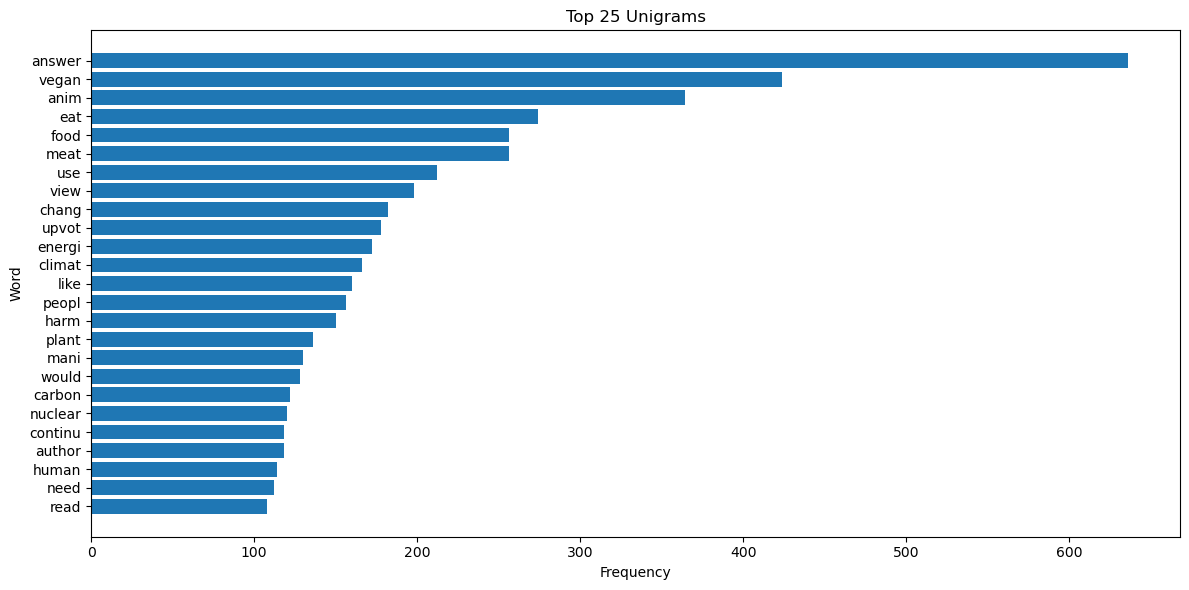

In [95]:
# Create a CountVectorizer for unigrams
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=50)

# Fit and transform the 'text' column to get the word counts for unigrams
unigram_word_counts = unigram_vectorizer.fit_transform(cleaned_df['text'])

# Get the feature names (unigrams)
unigram_feature_names = unigram_vectorizer.get_feature_names_out()

# Sum the word counts for unigrams across all documents
unigram_word_counts_sum = unigram_word_counts.sum(axis=0)

# Create a DataFrame for the top 25 unigrams
top_unigrams_df = pd.DataFrame({'word': unigram_feature_names, 'count': unigram_word_counts_sum.tolist()[0]})

# Sort by count in descending order
top_unigrams_df = top_unigrams_df.sort_values(by='count', ascending=False)

# Plot the top 50 unigrams
plt.figure(figsize=(12, 6))
plt.barh(top_unigrams_df['word'][:25], top_unigrams_df['count'][:25])
plt.gca().invert_yaxis()
plt.title('Top 25 Unigrams')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()

# Show the plot for unigrams
plt.show()


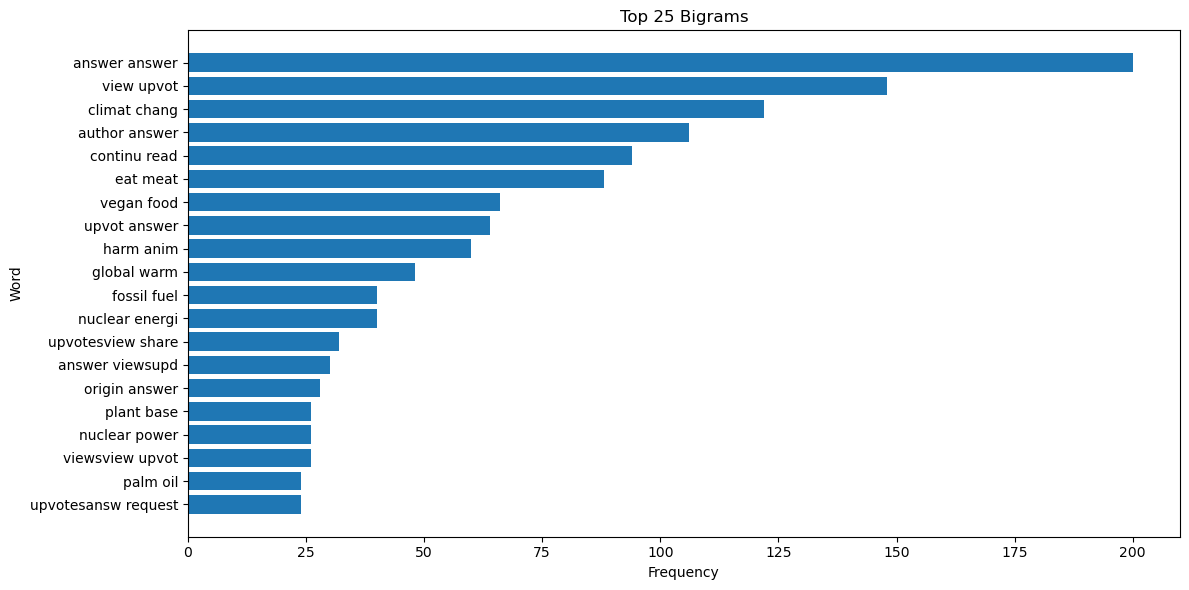

In [96]:
# Create a CountVectorizer for bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=50)

# Fit and transform the 'text' column to get the word counts for bigrams
bigram_word_counts = bigram_vectorizer.fit_transform(cleaned_df['text'])

# Get the feature names (bigrams)
bigram_feature_names = bigram_vectorizer.get_feature_names_out()

# Sum the word counts for bigrams across all documents
bigram_word_counts_sum = bigram_word_counts.sum(axis=0)

# Create a DataFrame for the top 25 bigrams
top_bigrams_df = pd.DataFrame({'word': bigram_feature_names, 'count': bigram_word_counts_sum.tolist()[0]})

# Sort by count in descending order
top_bigrams_df = top_bigrams_df.sort_values(by='count', ascending=False)

# Plot the top 50 bigrams
plt.figure(figsize=(12, 6))
plt.barh(top_bigrams_df['word'][:20], top_bigrams_df['count'][:20])
plt.gca().invert_yaxis()
plt.title('Top 25 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()

# Show the plot for bigrams
plt.show()


## Another Attempt to remove custom stop words like upvotes, views etc.

In [97]:
import re
import pandas as pd
from bs4 import BeautifulSoup
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define a list of custom stopwords to remove additional words
custom_stopwords = ['upvotes', 'answers', 'upvotesview', 'share', 'view', 'upvote', 'author', 'answer', 'continue', 'reading', 'originally', 'answered', 'quora', 'subscriber', 'access']

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to remove custom stopwords from text
def remove_custom_stopwords(text):
    for word in custom_stopwords:
        text = re.sub(r'\b' + re.escape(word) + r'\b', '', text)
    return text

# Initialize the list to store cleaned data
cleaned_data = []

# Iterate through each question and its associated answers
for question, answers in data.items():
    for answer in answers:
        # Extract relevant information from the answer
        text = answer['text']

        # Remove unwanted text at the end
        text = re.sub(r'\n\d+ viewsView upvotesAnswer requested by\n.*$', '', text, flags=re.MULTILINE)

        # Extract views if available
        views_match = views_pattern.search(text)
        if views_match:
            views = views_match.group(1)
            text = views_pattern.sub('', text)  # Remove views from text
        else:
            views = None

        upvotes = re.search(r'(\d+) Upvotes', answer['upvotes'])
        if upvotes:
            upvotes = upvotes.group(1)
            text = re.sub(r'(\d+) Upvotes', '', text)  # Remove upvotes from text
        else:
            upvotes = None

        # Remove emojis from text
        text = remove_emojis(text)

        # Remove punctuation and other common elements
        text = remove_punctuation_and_common(text)

        # Clean the text by removing HTML tags and extra spaces
        text = BeautifulSoup(text, 'html.parser').get_text()
        text = ' '.join(text.split())

        # Remove diacritics (accents) from text
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

        # Lowercasing
        text = text.lower()

        # Tokenization (split text into words)
        words = word_tokenize(text)

        # Remove stopwords and apply lemmatization
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

        # Remove custom stopwords
        cleaned_text = remove_custom_stopwords(' '.join(words))

        # Append the data to the list as a dictionary
        cleaned_data.append({'question': question, 'text': cleaned_text, 'views': views, 'upvotes': upvotes,
                             'author': author, 'author_bio': author_bio})

# Create a pandas DataFrame from the list of dictionaries
cleaned_df = pd.DataFrame(cleaned_data)

# Print the first few rows of the DataFrame (for verification)
print(cleaned_df.head())

# Optionally, you can save the DataFrame to a CSV file if needed
cleaned_df.to_csv('cleaned_quora_data.csv', index=False)

print("Data preprocessing and cleaning completed. DataFrame created.")


                                         question  \
0  Are vegans making an impact on climate change?   
1  Are vegans making an impact on climate change?   
2  Are vegans making an impact on climate change?   
3  Are vegans making an impact on climate change?   
4  Are vegans making an impact on climate change?   

                                                text views upvotes  \
0  like think arrived balanced perspective kind i...  None       5   
1  individual basis vegan diet take something lik...   195       2   
2  human making impact climate change driven sola...   659       8   
3  related vegan help climate change nope called ...    48    None   
4  related veganism affect climate change much af...   106       6   

           author                          author_bio  
0  Maureen Murtha  Studied at University of Florida8y  
1  Maureen Murtha  Studied at University of Florida8y  
2  Maureen Murtha  Studied at University of Florida8y  
3  Maureen Murtha  Studied at Univer

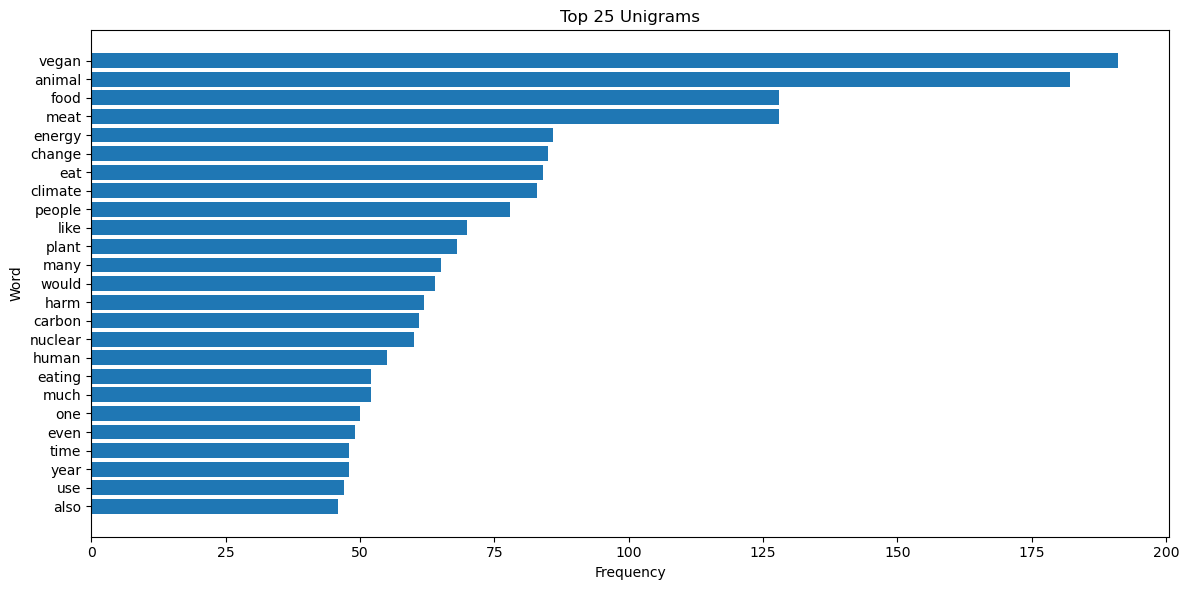

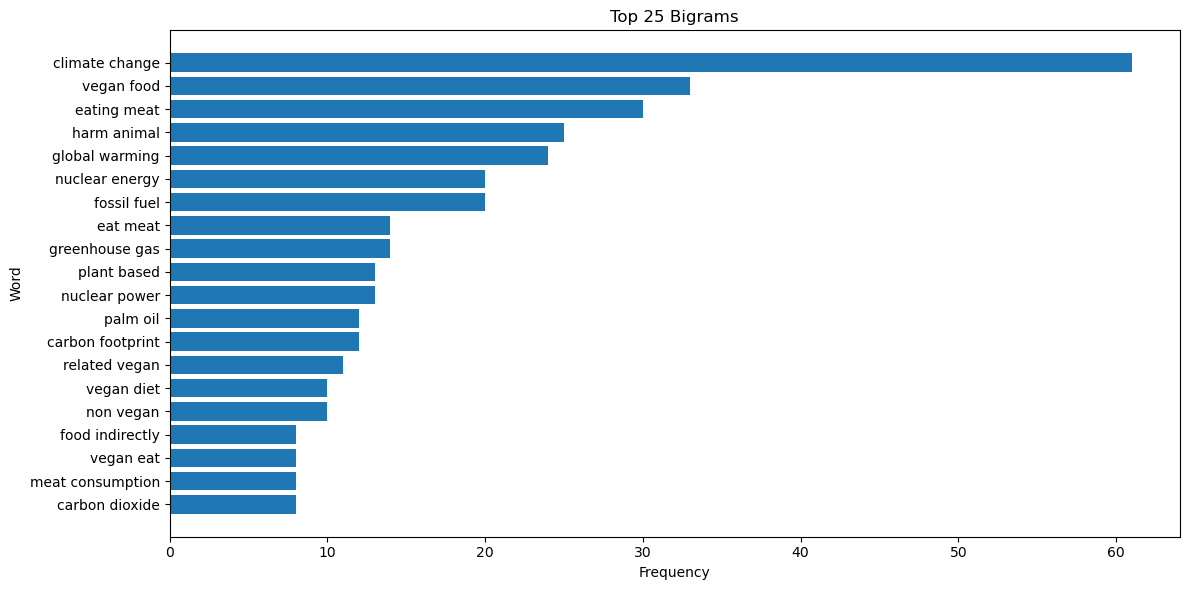

In [98]:
# Create a CountVectorizer for unigrams
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=50)

# Fit and transform the 'text' column to get the word counts for unigrams
unigram_word_counts = unigram_vectorizer.fit_transform(cleaned_df['text'])

# Get the feature names (unigrams)
unigram_feature_names = unigram_vectorizer.get_feature_names_out()

# Sum the word counts for unigrams across all documents
unigram_word_counts_sum = unigram_word_counts.sum(axis=0)

# Create a DataFrame for the top 25 unigrams
top_unigrams_df = pd.DataFrame({'word': unigram_feature_names, 'count': unigram_word_counts_sum.tolist()[0]})

# Sort by count in descending order
top_unigrams_df = top_unigrams_df.sort_values(by='count', ascending=False)

# Plot the top 50 unigrams
plt.figure(figsize=(12, 6))
plt.barh(top_unigrams_df['word'][:25], top_unigrams_df['count'][:25])
plt.gca().invert_yaxis()
plt.title('Top 25 Unigrams')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()

# Show the plot for unigrams
plt.show()


# Create a CountVectorizer for bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=50)

# Fit and transform the 'text' column to get the word counts for bigrams
bigram_word_counts = bigram_vectorizer.fit_transform(cleaned_df['text'])

# Get the feature names (bigrams)
bigram_feature_names = bigram_vectorizer.get_feature_names_out()

# Sum the word counts for bigrams across all documents
bigram_word_counts_sum = bigram_word_counts.sum(axis=0)

# Create a DataFrame for the top 25 bigrams
top_bigrams_df = pd.DataFrame({'word': bigram_feature_names, 'count': bigram_word_counts_sum.tolist()[0]})

# Sort by count in descending order
top_bigrams_df = top_bigrams_df.sort_values(by='count', ascending=False)

# Plot the top 50 bigrams
plt.figure(figsize=(12, 6))
plt.barh(top_bigrams_df['word'][:20], top_bigrams_df['count'][:20])
plt.gca().invert_yaxis()
plt.title('Top 25 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()

# Show the plot for bigrams
plt.show()


In [99]:
# Loop through the top bigrams and their frequencies
for index, row in top_bigrams_df.head(25).iterrows():
    bigram = row['word']
    frequency = row['count']
    print(f'Bigram: {bigram}, Frequency: {frequency}')


Bigram: climate change, Frequency: 61
Bigram: vegan food, Frequency: 33
Bigram: eating meat, Frequency: 30
Bigram: harm animal, Frequency: 25
Bigram: global warming, Frequency: 24
Bigram: nuclear energy, Frequency: 20
Bigram: fossil fuel, Frequency: 20
Bigram: eat meat, Frequency: 14
Bigram: greenhouse gas, Frequency: 14
Bigram: plant based, Frequency: 13
Bigram: nuclear power, Frequency: 13
Bigram: palm oil, Frequency: 12
Bigram: carbon footprint, Frequency: 12
Bigram: related vegan, Frequency: 11
Bigram: vegan diet, Frequency: 10
Bigram: non vegan, Frequency: 10
Bigram: food indirectly, Frequency: 8
Bigram: vegan eat, Frequency: 8
Bigram: meat consumption, Frequency: 8
Bigram: carbon dioxide, Frequency: 8
Bigram: renewable energy, Frequency: 8
Bigram: many many, Frequency: 7
Bigram: air water, Frequency: 7
Bigram: going vegan, Frequency: 7
Bigram: indirectly harm, Frequency: 7


In [100]:
import re

# Initialize a dictionary to store author upvotes
author_upvotes = {}

# Iterate through each question and its associated answers
for question, answers in data.items():
    for answer in answers:
        author = answer['author']
        upvotes_match = re.search(r'(\d+) Upvotes', answer.get('upvotes', '0 Upvotes'))
        upvotes = int(upvotes_match.group(1)) if upvotes_match else 0

        # Check if the author is already in the dictionary
        if author in author_upvotes:
            author_upvotes[author] += upvotes
        else:
            author_upvotes[author] = upvotes

# Sort the authors by total upvotes in descending order
top_authors = sorted(author_upvotes.items(), key=lambda x: x[1], reverse=True)

# Print the top authors and their total upvotes
for author, total_upvotes in top_authors:
    print(f'Author: {author}, Total Upvotes: {total_upvotes}')


Author: Jan Soloven, Total Upvotes: 913
Author: Richard Muller, Total Upvotes: 691
Author: John Galvin, Total Upvotes: 676
Author: What seems easy but is really hard? — Related, Total Upvotes: 656
Author: Why do some people return to eating meat after they have been vegetarian for many years? — Related, Total Upvotes: 539
Author: Andreas Svensson, Total Upvotes: 303
Author: Why do you not like vegans? — Related, Total Upvotes: 118
Author: Cailean MacConnich, Total Upvotes: 115
Author: Louis Walker, Total Upvotes: 107
Author: Donna Fernstrom, Total Upvotes: 86
Author: Louis Vaught, Total Upvotes: 70
Author: John B., Total Upvotes: 52
Author: Xiao Nengshou, Total Upvotes: 50
Author: How and why do questions get marked as insincere on Quora? — Related, Total Upvotes: 49
Author: Wayne Roberts, Total Upvotes: 37
Author: Jayne Kulikauskas, Total Upvotes: 30
Author: Michael Tuttle, Total Upvotes: 30
Author: Omar Bessa, Total Upvotes: 28
Author: Olga Radzikh, Total Upvotes: 23
Author: Anonymou

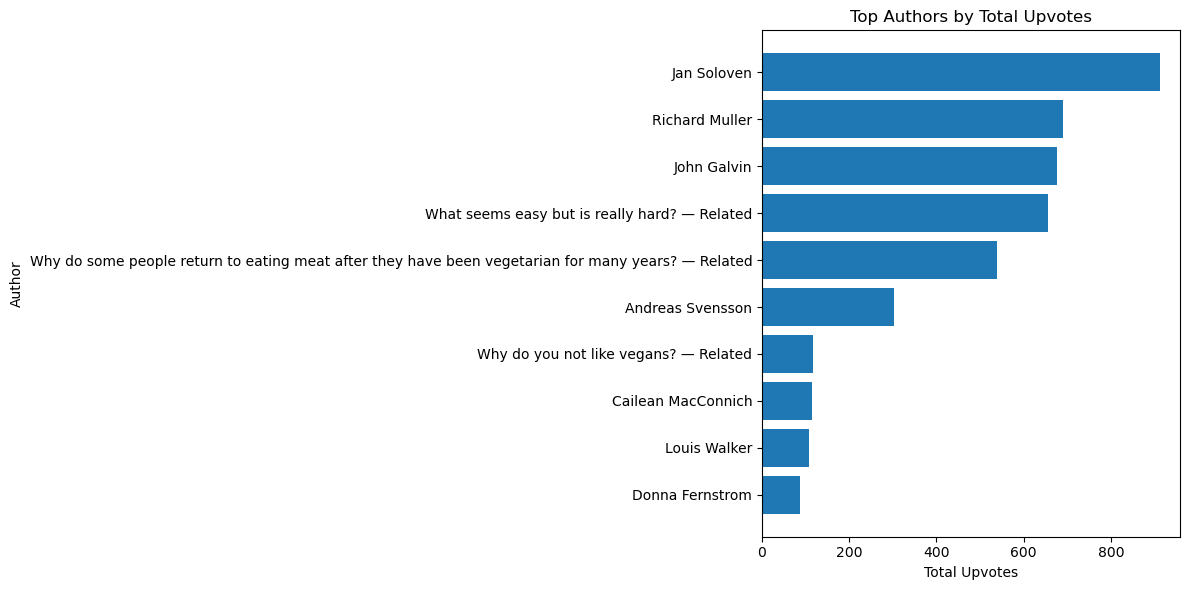

In [101]:
import re
import matplotlib.pyplot as plt

# Initialize a dictionary to store author upvotes
author_upvotes = {}

# Iterate through each question and its associated answers
for question, answers in data.items():
    for answer in answers:
        author = answer['author']
        upvotes_match = re.search(r'(\d+) Upvotes', answer.get('upvotes', '0 Upvotes'))
        upvotes = int(upvotes_match.group(1)) if upvotes_match else 0

        # Check if the author is already in the dictionary
        if author in author_upvotes:
            author_upvotes[author] += upvotes
        else:
            author_upvotes[author] = upvotes

# Sort the authors by total upvotes in descending order
top_authors = sorted(author_upvotes.items(), key=lambda x: x[1], reverse=True)

# Extract the top authors and their total upvotes
top_author_names, top_author_upvotes = zip(*top_authors)

# Create a bar graph for the top authors
plt.figure(figsize=(12, 6))
plt.barh(top_author_names[:10], top_author_upvotes[:10])  # Display the top 10 authors
plt.gca().invert_yaxis()
plt.title('Top Authors by Total Upvotes')
plt.xlabel('Total Upvotes')
plt.ylabel('Author')
plt.tight_layout()

# Show the bar graph
plt.show()


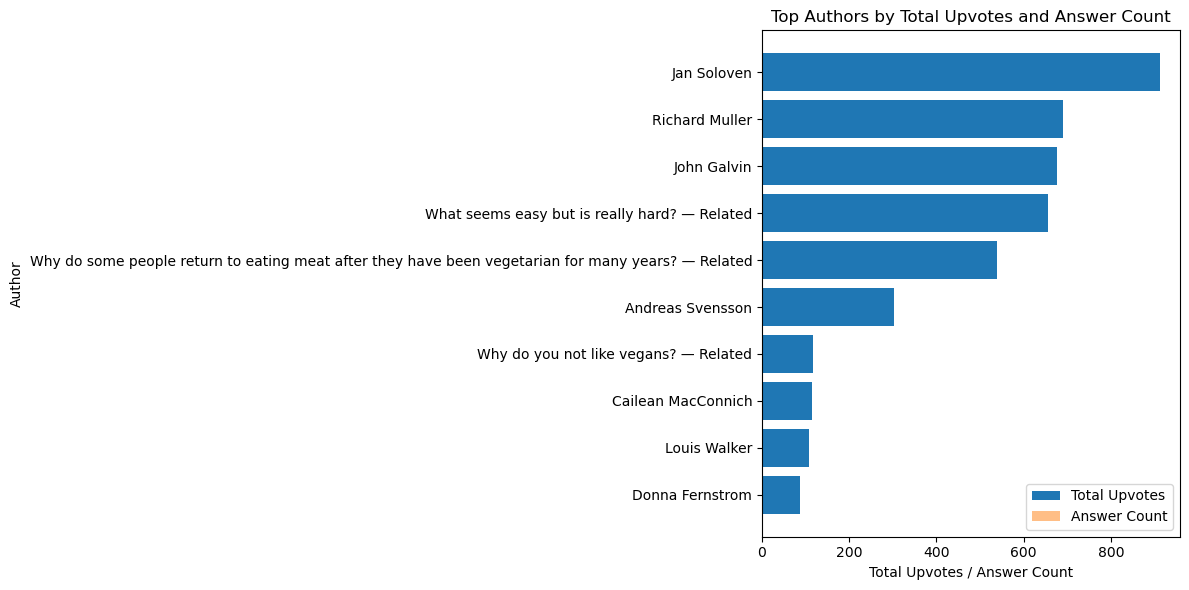

In [102]:
import re
import matplotlib.pyplot as plt

# Initialize a dictionary to store author information
author_info = {}

# Iterate through each question and its associated answers
for question, answers in data.items():
    for answer in answers:
        author = answer['author']
        upvotes_match = re.search(r'(\d+) Upvotes', answer.get('upvotes', '0 Upvotes'))
        upvotes = int(upvotes_match.group(1)) if upvotes_match else 0

        # Check if the author is already in the dictionary
        if author in author_info:
            author_info[author]['upvotes'] += upvotes
            author_info[author]['answers'] += 1
        else:
            author_info[author] = {'upvotes': upvotes, 'answers': 1}

# Sort the authors by total upvotes in descending order
top_authors = sorted(author_info.items(), key=lambda x: x[1]['upvotes'], reverse=True)

# Extract the top authors and their total upvotes and answer counts
top_author_names, top_author_data = zip(*top_authors)

# Extract the total upvotes and answer counts
top_author_upvotes = [data['upvotes'] for data in top_author_data]
top_author_answers = [data['answers'] for data in top_author_data]

# Create a bar graph for the top authors and their upvotes
plt.figure(figsize=(12, 6))
plt.barh(top_author_names[:10], top_author_upvotes[:10], label='Total Upvotes')
plt.barh(top_author_names[:10], top_author_answers[:10], label='Answer Count', alpha=0.5)
plt.gca().invert_yaxis()
plt.title('Top Authors by Total Upvotes and Answer Count')
plt.xlabel('Total Upvotes / Answer Count')
plt.ylabel('Author')
plt.legend()
plt.tight_layout()

# Show the bar graph
plt.show()


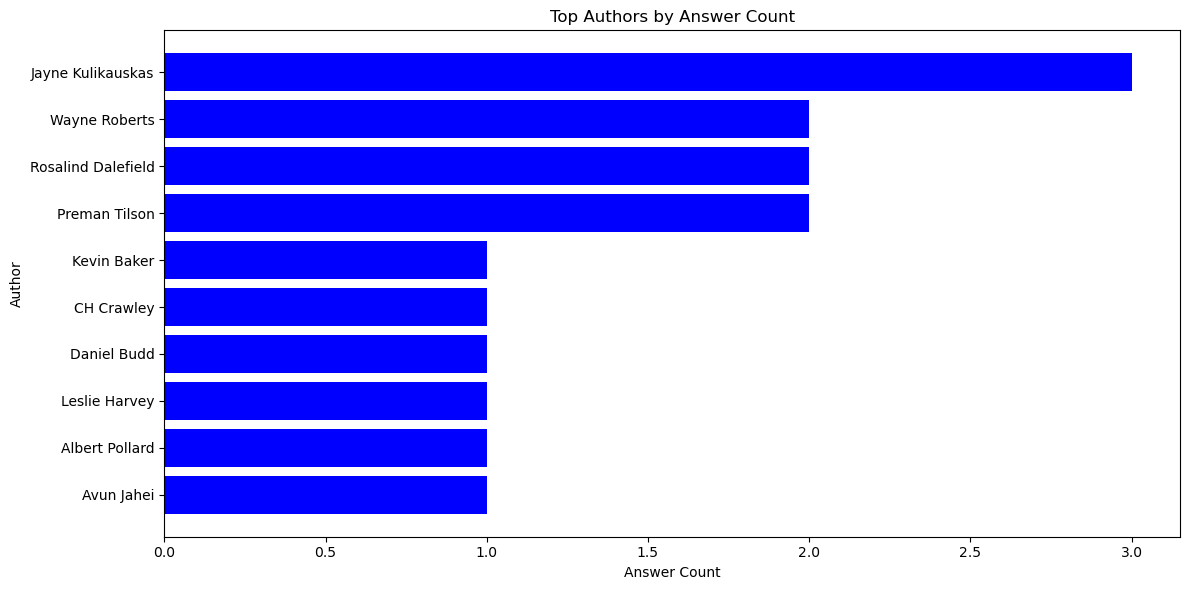

In [103]:
import re
import matplotlib.pyplot as plt

# Initialize a dictionary to store author information
author_info = {}

# Iterate through each question and its associated answers
for question, answers in data.items():
    for answer in answers:
        author = answer['author']

        # Check if the author is already in the dictionary
        if author in author_info:
            author_info[author] += 1
        else:
            author_info[author] = 1

# Sort the authors by the number of answers in descending order
top_authors = sorted(author_info.items(), key=lambda x: x[1], reverse=True)

# Extract the top authors and their answer counts
top_author_names, top_author_answers = zip(*top_authors)

# Create a bar graph for the top authors and their answer counts
plt.figure(figsize=(12, 6))
plt.barh(top_author_names[:10], top_author_answers[:10], color='blue')
plt.gca().invert_yaxis()
plt.title('Top Authors by Answer Count')
plt.xlabel('Answer Count')
plt.ylabel('Author')
plt.tight_layout()

# Show the bar graph
plt.show()


In [104]:
# Sort the DataFrame by the 'views' column in descending order
cleaned_df['views'] = pd.to_numeric(cleaned_df['views'], errors='coerce')  # Convert 'views' to numeric
top_comments = cleaned_df.sort_values(by='views', ascending=False).head(5)

# Print the complete comments with the maximum views
for index, row in top_comments.iterrows():
    print(f'Question: {row["question"]}')
    print(f'Author: {row["author"]}')
    print(f'Views: {row["views"]}')
    print(f'Comment:\n{row["text"]}\n')


Question: How exactly is becoming vegan, paying extra taxes, and driving Teslas going to save climate change while the majority like China does nothing?
Author: Maureen Murtha
Views: 876.0
Comment:
related think choosing vegan meat could help fight climate change probably u country use wasteful inhumane practice keeping livestock confined pen feeding expensively produced grain country livestock graze field land suited arable use however grow arable crop instead meat require either intensive forced cultivation import    

Question: To solve climate change, should we go vegan and burn less fossil fuels or eliminate fossil fuels and eat less meat?
Author: Maureen Murtha
Views: 836.0
Comment:
managing partner one atomauthor   fossil fuel used fuel car airplane power electricity plant heat home also used make medicine cosmetic plastic synthetic fabric lubricant shoe toothpaste sunglass tire tennis ball tv also product oil gas robert pattison lived worked several country read widely    every

In [105]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Load the pre-processed data from the CSV file
cleaned_df = pd.read_csv('cleaned_quora_data.csv')

# A function to apply sentiment analysis using VADER
def analyze_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

# Applying sentiment analysis to each text in the DataFrame
cleaned_df['sentiment_scores'] = cleaned_df['text'].apply(analyze_sentiment)

# Determine sentiment labels based on the compound score
def get_sentiment_label(sentiment_scores):
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

cleaned_df['sentiment'] = cleaned_df['sentiment_scores'].apply(get_sentiment_label)

# Print the DataFrame with sentiment analysis results
print(cleaned_df[['text', 'sentiment_scores', 'sentiment']])

# Optionally, we can save the DataFrame with sentiment analysis results to a new CSV file
cleaned_df.to_csv('sentiment_analysis_results.csv', index=False)

print("Sentiment analysis completed.")


                                                  text  \
0    like think arrived balanced perspective kind i...   
1    individual basis vegan diet take something lik...   
2    human making impact climate change driven sola...   
3    related vegan help climate change nope called ...   
4    related veganism affect climate change much af...   
..                                                 ...   
123  related becoming vegan save planet permanent d...   
124  related vegan vegetarian save environment comp...   
125   musician broadcaster constant readerauthor   ...   
126     viewsupdated certainly climate science deni...   
127  related cow domesticated actually know sure kn...   

                                      sentiment_scores sentiment  
0    {'neg': 0.035, 'neu': 0.793, 'pos': 0.173, 'co...  Positive  
1    {'neg': 0.018, 'neu': 0.849, 'pos': 0.133, 'co...  Positive  
2    {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...  Positive  
3    {'neg': 0.237, 'neu': 0.647, '

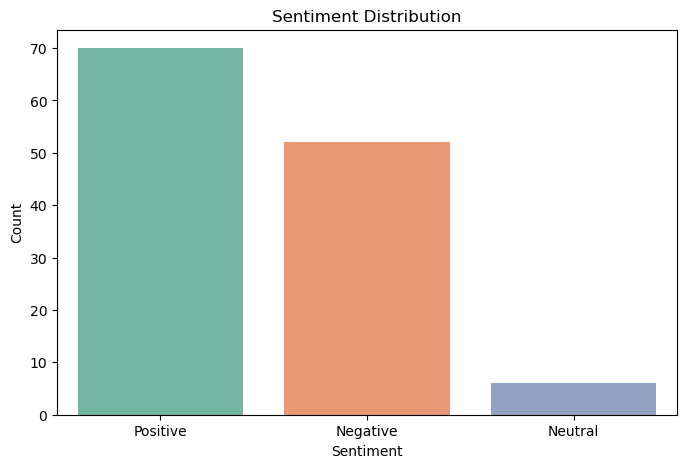

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame with sentiment analysis results
cleaned_df = pd.read_csv('sentiment_analysis_results.csv')

# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=cleaned_df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



Here's how to interpret the compound score:

Positive Score: If the compound score is greater than or equal to 0.05, it suggests a positive sentiment. In your case, with an average compound score of 0.1578, the sentiment leans more toward the positive side.

Negative Score: If the compound score is less than or equal to -0.05, it suggests a negative sentiment. Your average score is positive, so it doesn't indicate a predominantly negative sentiment.

Neutral Score: If the compound score is between -0.05 and 0.05, it suggests a neutral sentiment. Since your average score is greater than 0.05, it's considered positive.

In [107]:
# Calculate sentiment value counts
sentiment_counts = cleaned_df['sentiment'].value_counts()

# Calculate percentage of each sentiment
sentiment_percentage = (sentiment_counts / sentiment_counts.sum()) * 100

# Print the count and percentage of each sentiment
for sentiment, count in sentiment_counts.items():
    percentage = sentiment_percentage[sentiment]
    print(f"{sentiment}: Count - {count}, Percentage - {percentage:.2f}%")


Positive: Count - 70, Percentage - 54.69%
Negative: Count - 52, Percentage - 40.62%
Neutral: Count - 6, Percentage - 4.69%


In [108]:
import pandas as pd
import ast  # Import the ast module for literal evaluation of strings

# Load the DataFrame with sentiment analysis results
cleaned_df = pd.read_csv('sentiment_analysis_results.csv')

# Convert the sentiment_scores column from string to dictionary
cleaned_df['sentiment_scores'] = cleaned_df['sentiment_scores'].apply(ast.literal_eval)

# Calculate the average sentiment compound score
average_compound_score = cleaned_df['sentiment_scores'].apply(lambda x: x['compound']).mean()
print("Average Compound Score:", average_compound_score)


# Draw a conclusion based on the sentiment distribution and average score
if average_compound_score >= 0.05:
    conclusion = "The overall sentiment is positive."
elif average_compound_score <= -0.05:
    conclusion = "The overall sentiment is negative."
else:
    conclusion = "The overall sentiment is neutral."

print("Conclusion:", conclusion)


Average Compound Score: 0.15777890624999993
Conclusion: The overall sentiment is positive.


In [109]:
import pandas as pd
from gensim import corpora, models
import gensim

# Load the pre-processed data
cleaned_df = pd.read_csv('cleaned_quora_data.csv')

# Tokenize the text (if not already tokenized)
documents = [text.split() for text in cleaned_df['text']]

# Create a dictionary of terms
dictionary = corpora.Dictionary(documents)

# Create a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Build an LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics and their top words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
topic_assignments = [max(lda_model[doc], key=lambda item: item[1]) for doc in corpus]

# Add the topic assignments to the DataFrame
cleaned_df['topic'] = [assignment[0] for assignment in topic_assignments]

# Print the DataFrame with topic assignments
print(cleaned_df[['text', 'topic']])


(0, '0.014*"meat" + 0.013*"vegan" + 0.009*"food" + 0.008*"animal" + 0.008*"eat"')
(1, '0.012*"vegan" + 0.011*"food" + 0.010*"animal" + 0.010*"meat" + 0.006*"eat"')
(2, '0.014*"energy" + 0.013*"nuclear" + 0.006*"power" + 0.006*"much" + 0.005*"wind"')
(3, '0.029*"animal" + 0.019*"vegan" + 0.012*"harm" + 0.011*"food" + 0.007*"many"')
(4, '0.007*"soil" + 0.007*"vegan" + 0.006*"carbon" + 0.005*"climate" + 0.005*"water"')
                                                  text  topic
0    like think arrived balanced perspective kind i...      3
1    individual basis vegan diet take something lik...      4
2    human making impact climate change driven sola...      0
3    related vegan help climate change nope called ...      0
4    related veganism affect climate change much af...      3
..                                                 ...    ...
123  related becoming vegan save planet permanent d...      0
124  related vegan vegetarian save environment comp...      3
125   musician broadca

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Tokenize the 'text' column if not already tokenized
documents = [text.split() for text in cleaned_df['text']]

# Convert the tokenized text back to text for vectorization
cleaned_df['text'] = [' '.join(tokens) for tokens in documents]

# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(cleaned_df['text'])

# Apply NMF
num_topics = 5  # Set the number of topics
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# Get the top words for each topic
feature_names = vectorizer.get_feature_names_out()
top_words_per_topic = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_per_topic.append(top_words)

# Print top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic {i + 1}: {', '.join(top_words)}")

# Add topic labels to the DataFrame
cleaned_df['topic_labels'] = nmf_matrix.argmax(axis=1)


Topic 1: meat, vegan, eating, vegetarian, eat, dairy, possibly, people, change, vegetable
Topic 2: nuclear, energy, power, fuel, fossil, world, wind, solution, question, china
Topic 3: animal, harm, food, vegan, crop, indirectly, kill, eat, death, like
Topic 4: agriculture, soil, environment, water, regenerative, animal, conventional, ruminant, grassland, fertilizer
Topic 5: carbon, climate, change, global, warming, footprint, vegan, related, emission, diet


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


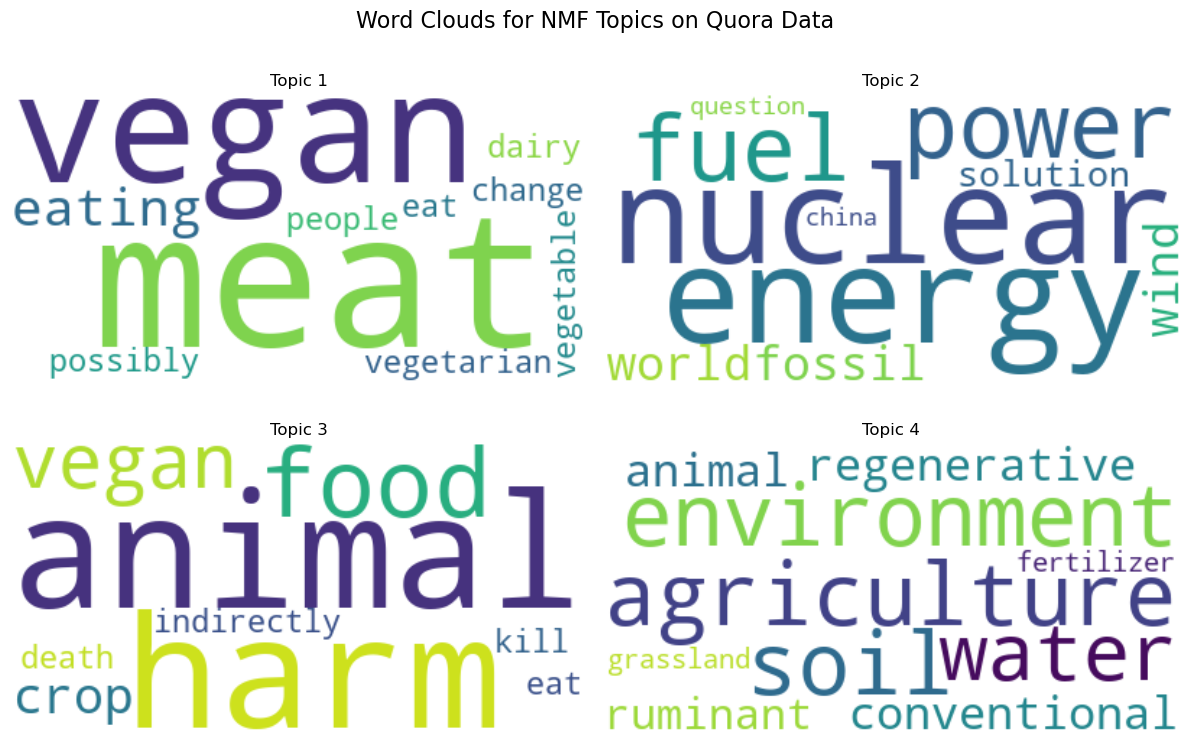

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already run LDA and have the 'optimal_lda_model' and 'optimal_top_words_per_topic' variables

# Create a grid of word clouds for each topic
num_topics = len(top_words_per_topic)

rows = num_topics // 2  # You can adjust the number of rows as needed

# Create a subplot for each topic
fig, axes = plt.subplots(rows, 2, figsize=(12, 8))
fig.suptitle("Word Clouds for NMF Topics on Quora Data", fontsize=16)

for i, ax in enumerate(axes.ravel()):
    if i < num_topics:
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate(' '.join(top_words_per_topic[i]))
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f"Topic {i + 1}")
        ax.axis("off")
    else:
        fig.delaxes(ax)  # Remove any unused subplots

plt.tight_layout()
plt.show()


In [112]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Tokenize the 'text' column if not already tokenized
documents = [text.split() for text in cleaned_df['text']]

# Convert the tokenized text back to text for vectorization
cleaned_df['text'] = [' '.join(tokens) for tokens in documents]

# Apply Count Vectorization (Bag of Words)
count_vectorizer = CountVectorizer(max_df=0.85, min_df=2, stop_words='english')
count_matrix = count_vectorizer.fit_transform(cleaned_df['text'])

# Apply LDA
num_topics = 5  # Set the number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = lda_model.fit_transform(count_matrix)

# Get the top words for each topic
feature_names = count_vectorizer.get_feature_names_out()
top_words_per_topic = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_per_topic.append(top_words)

# Print top words for each topic
for i, top_words in enumerate(top_words_per_topic):
    print(f"LDA Topic {i + 1}: {', '.join(top_words)}")

# Add LDA topic labels to the DataFrame
cleaned_df['lda_topic_labels'] = lda_matrix.argmax(axis=1)


LDA Topic 1: energy, nuclear, power, china, wind, change, climate, fuel, solar, fossil
LDA Topic 2: vegan, meat, animal, eat, food, change, climate, people, eating, question
LDA Topic 3: animal, vegan, food, harm, crop, eat, plant, like, human, kill
LDA Topic 4: energy, change, climate, use, used, world, carbon, know, time, people
LDA Topic 5: nuclear, meat, people, energy, climate, soil, way, plant, year, carbon


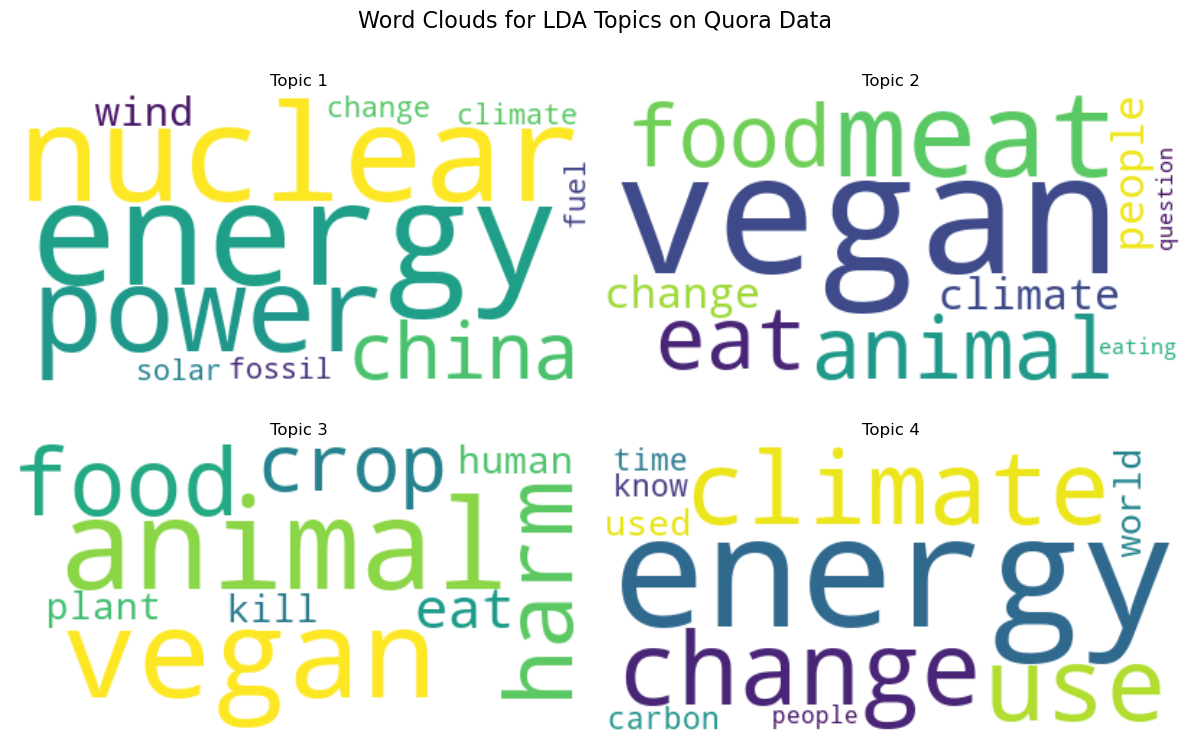

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already run LDA and have the 'optimal_lda_model' and 'optimal_top_words_per_topic' variables

# Create a grid of word clouds for each topic
num_topics = len(top_words_per_topic)

rows = num_topics // 2  # You can adjust the number of rows as needed

# Create a subplot for each topic
fig, axes = plt.subplots(rows, 2, figsize=(12, 8))
fig.suptitle("Word Clouds for LDA Topics on Quora Data", fontsize=16)

for i, ax in enumerate(axes.ravel()):
    if i < num_topics:
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate(' '.join(top_words_per_topic[i]))
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f"Topic {i + 1}")
        ax.axis("off")
    else:
        fig.delaxes(ax)  # Remove any unused subplots

plt.tight_layout()
plt.show()


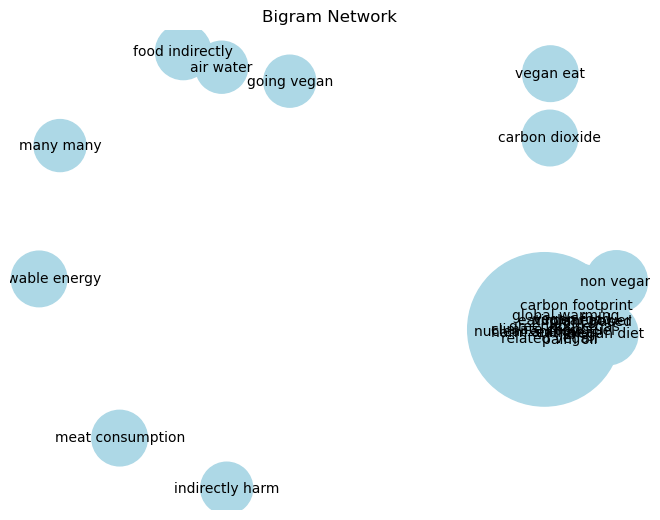

In [114]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the list of bigrams and their frequencies
bigrams_data = [
    ("climate change", 61),
    ("vegan food", 33),
    ("eating meat", 30),
    ("harm animal", 25),
    ("global warming", 24),
    ("nuclear energy", 20),
    ("fossil fuel", 20),
    ("eat meat", 14),
    ("greenhouse gas", 14),
    ("plant based", 13),
    ("nuclear power", 13),
    ("palm oil", 12),
    ("carbon footprint", 12),
    ("related vegan", 11),
    ("vegan diet", 10),
    ("non vegan", 10),
    ("food indirectly", 8),
    ("vegan eat", 8),
    ("meat consumption", 8),
    ("carbon dioxide", 8),
    ("renewable energy", 8),
    ("many many", 7),
    ("air water", 7),
    ("going vegan", 7),
    ("indirectly harm", 7),
]

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each bigram with their frequency as an attribute
for bigram, frequency in bigrams_data:
    G.add_node(bigram, frequency=frequency)

# Define a threshold for co-occurrence frequency
threshold = 10  # You can adjust this value as needed

# Connect nodes based on co-occurrence frequency
for i in range(len(bigrams_data)):
    for j in range(i + 1, len(bigrams_data)):
        bigram1, freq1 = bigrams_data[i]
        bigram2, freq2 = bigrams_data[j]
        if freq1 >= threshold and freq2 >= threshold:
            G.add_edge(bigram1, bigram2)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)
node_sizes = [200 * G.nodes[bigram]['frequency'] for bigram in G.nodes]
edge_labels = {edge: '' for edge in G.edges}
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='lightblue', font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title('Bigram Network')
plt.show()


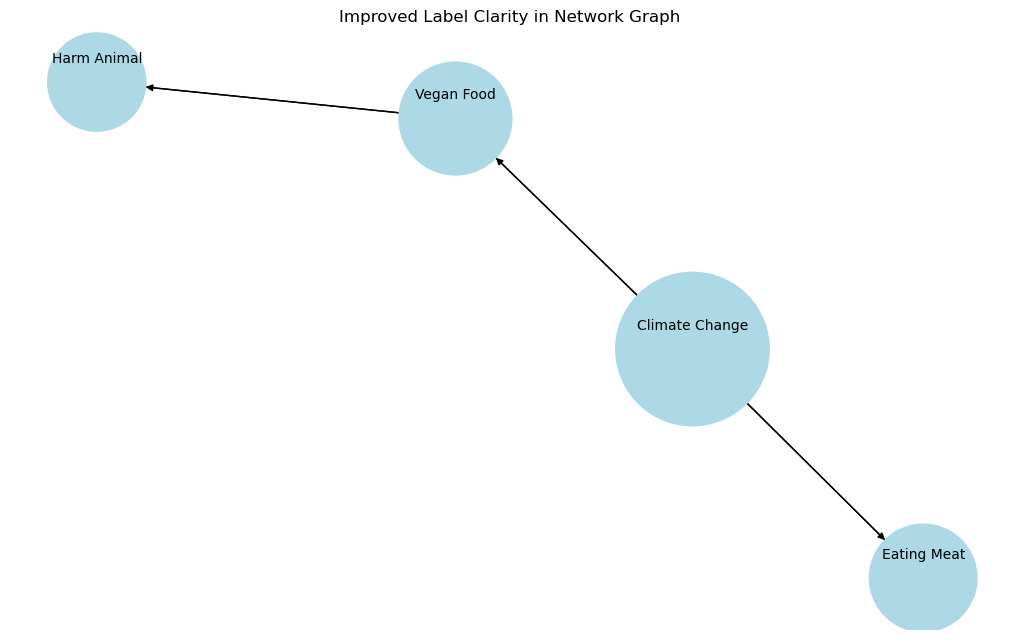

In [115]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample network graph
G = nx.DiGraph()
G.add_node("Climate Change", label="Climate Change", frequency=61)
G.add_node("Vegan Food", label="Vegan Food", frequency=33)
G.add_node("Eating Meat", label="Eating Meat", frequency=30)
G.add_node("Harm Animal", label="Harm Animal", frequency=25)
G.add_edge("Climate Change", "Vegan Food")
G.add_edge("Climate Change", "Eating Meat")
G.add_edge("Vegan Food", "Harm Animal")

# Adjust label positions to prevent overlaps
pos = nx.spring_layout(G, seed=42)
pos_labels = {node: (pos[node][0], pos[node][1] + 0.08) for node in G.nodes}

# Define node sizes based on frequency
node_sizes = [200 * G.nodes[node]['frequency'] for node in G.nodes]

# Visualize the graph with improved label positions
plt.figure(figsize=(10, 6))
nx.draw(G, pos, node_size=node_sizes, with_labels=False, node_color='lightblue', font_size=10, font_color='black')
nx.draw_networkx_labels(G, pos_labels, labels=nx.get_node_attributes(G, 'label'), font_size=10, font_color='black')
nx.draw_networkx_edges(G, pos)
plt.title('Improved Label Clarity in Network Graph')
plt.axis('off')
plt.show()
